# Pomiary, analiza i modelowanie systemów internetow
# Eksploracyjna Analiza Danych zgodnie z CRISP-DM
### Dane: e-commerce-customer-behavior-dataset.csv, Google Merch Shop
### Autorzy: Aleksander Pajorski, Kasper Radom

# 1. Dane e-commerce-customer-behavior-dataset.csv

## a) Opis danych

Pierwsza część zadania polega na analizie poziomu satyswakcji klientów sklepu internetowego. Dane pochodzą z repozytorium kaggle.com. Zbiór danych przedstawia zachowania klientów platformy e-commerce. Zawiera syntetycznie wygenerowane dane (350 rekordów) służące do analizy wzorców zakupowych i zaangażowania klientów.

In [12]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Wczytanie pliku z danymi
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")
df = pd.read_csv(f"{path}/E-commerce Customer Behavior - Sheet1.csv")

# Struktura danych
Zbiór zawiera 11 kolumn z danymi o klientach:

- Customer ID - Unikalny identyfikator klienta (liczba całkowita)
- Gender - Płeć klienta (Male/Female)
- Age - Wiek klienta
- City - Miasto zamieszkania (m.in. New York, Los Angeles, Chicago, San Francisco, Miami, Houston)
- Membership Type - Typ członkostwa (Gold, Silver, Bronze)
- Total Spend - Łączna kwota wydana przez klienta (USD)
- Items Purchased - Liczba zakupionych produktów
- Average Rating - Średnia ocena produktów (0-5)
- Discount Applied - Czy zastosowano zniżkę (TRUE/FALSE)
- Days Since Last Purchase - Dni od ostatniego zakupu
- Satisfaction Level - Poziom satysfakcji (Satisfied, Neutral, Unsatisfied)

In [14]:
print(df['City'].value_counts(), end=f"\n\n")
print(df['Membership Type'].value_counts(), end=f"\n\n")
print(df['Discount Applied'].value_counts(), end=f"\n\n")
print(df['Satisfaction Level'].value_counts())

City
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

Membership Type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64

Discount Applied
True     175
False    175
Name: count, dtype: int64

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64


In [15]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## b) Rozkład satysfakcji klientów

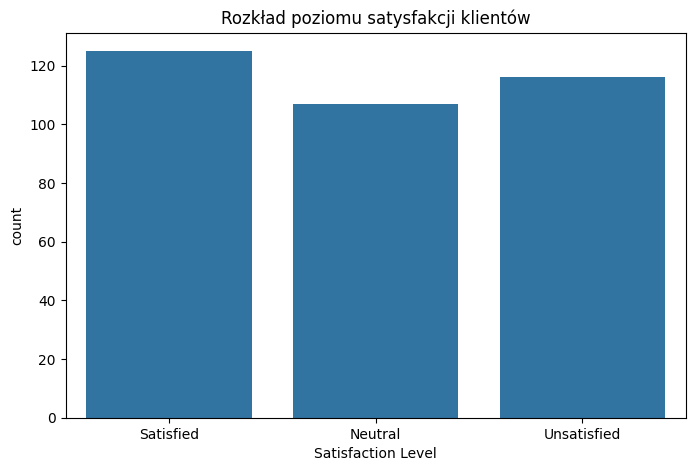

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Satisfaction Level', data=df, order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Rozkład poziomu satysfakcji klientów')
plt.show()

Wykres pokazuje rozkład satyswakcji użytkowników. Do każdego poziomu satysfakcji należy podobna ilość użytkowników, co jeest sygnałem alarmującym. 

## c) Zależność między satysfakcją a wydatkami

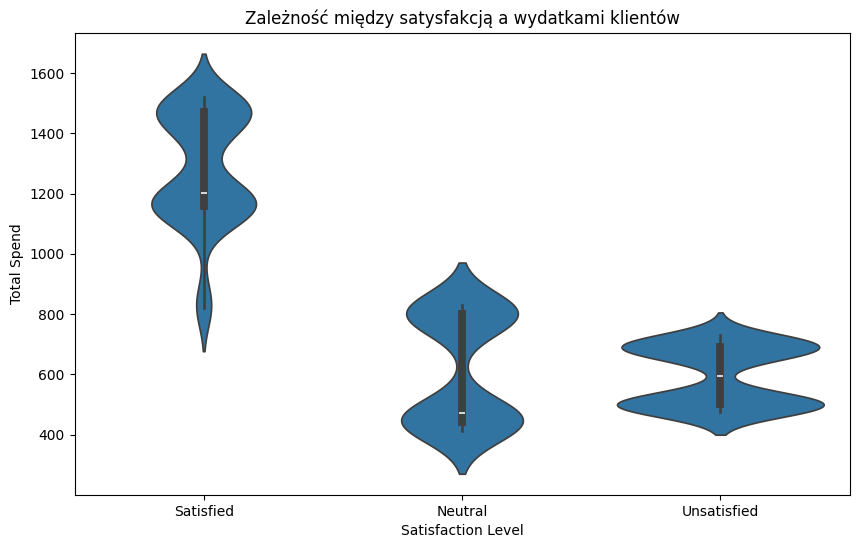

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Satisfaction Level', y='Total Spend', data=df, 
            order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Zależność między satysfakcją a wydatkami klientów')
plt.show()

Najwyższe wydatki obserwujemy w grupie klientów zadowolonych (Satisfied). Wynik ten jest zgodny z intuicyjnymi przewidywaniami. Klienci, którzy są zadowoleni są skłonni do większych zakupów, a tym samym większych wydatków.

## d) Zależność między satysfakcją a średnią oceną

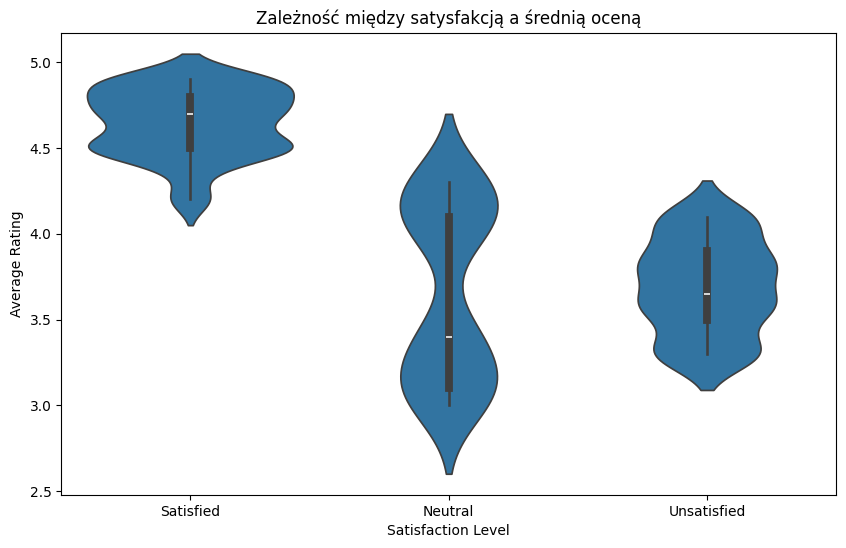

In [18]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Satisfaction Level', y='Average Rating', data=df,
            order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Zależność między satysfakcją a średnią oceną')
plt.show()

## e) Satysfakcja wg typu członkostwa

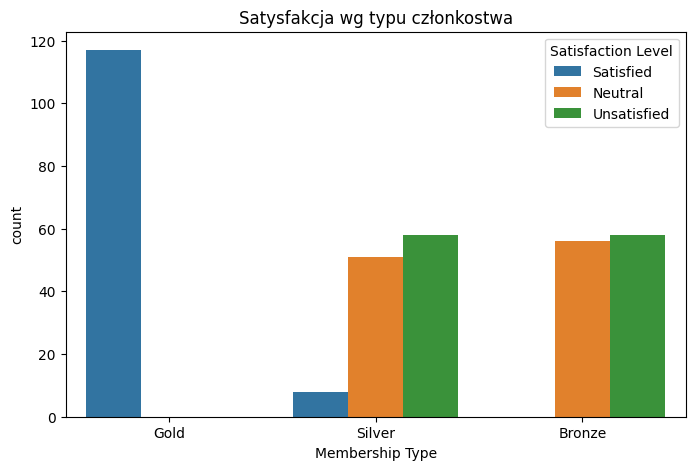

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Membership Type', hue='Satisfaction Level', data=df,
              hue_order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Satysfakcja wg typu członkostwa')
plt.show()

Na podstawie danych dotyczących satysfakcji w zależności od typu członkostwa można wywnioskować, że istnieje wyraźna zależność między poziomem członkostwa a zadowoleniem klientów. Klienci z członkostwem Gold wykazują najwyższy poziom satysfakcji, co może wynikać z dodatkowych benefitów, ekskluzywnych ofert lub lepszej obsługi przypisanej do tego pakietu. Członkowie Silver znajdują się prawdopodobnie w środku skali satysfakcji, podczas gdy członkostwo Bronze może wiązać się z najniższym poziomem zadowolenia, co może odzwierciedlać ograniczone korzyści lub mniejszą uwagę ze strony platformy. Taka struktura sugeruje, że program lojalnościowy skutecznie różnicuje doświadczenia klientów – im wyższy status członkostwa, tym lepsza percepcja usług. Warto jednak zbadać, czy niski poziom satysfakcji wśród członków Bronze nie wynika z niespełnionych oczekiwań lub niedostatecznej wartości oferty dla tej grupy. Może to być obszar wymagający optymalizacji, np. poprzez wprowadzenie dodatkowych korzyści nawet w podstawowym pakiecie. Jednocześnie wysoka satysfakcja klientów Gold potwierdza, że premiumowe rozwiązania są skuteczne w budowaniu pozytywnych doświadczeń i mogą być kluczowym czynnikiem utrzymania dochodowych, lojalnych klientów.

## f) Korelacja między zmiennymi liczbowymi a satysfakcją

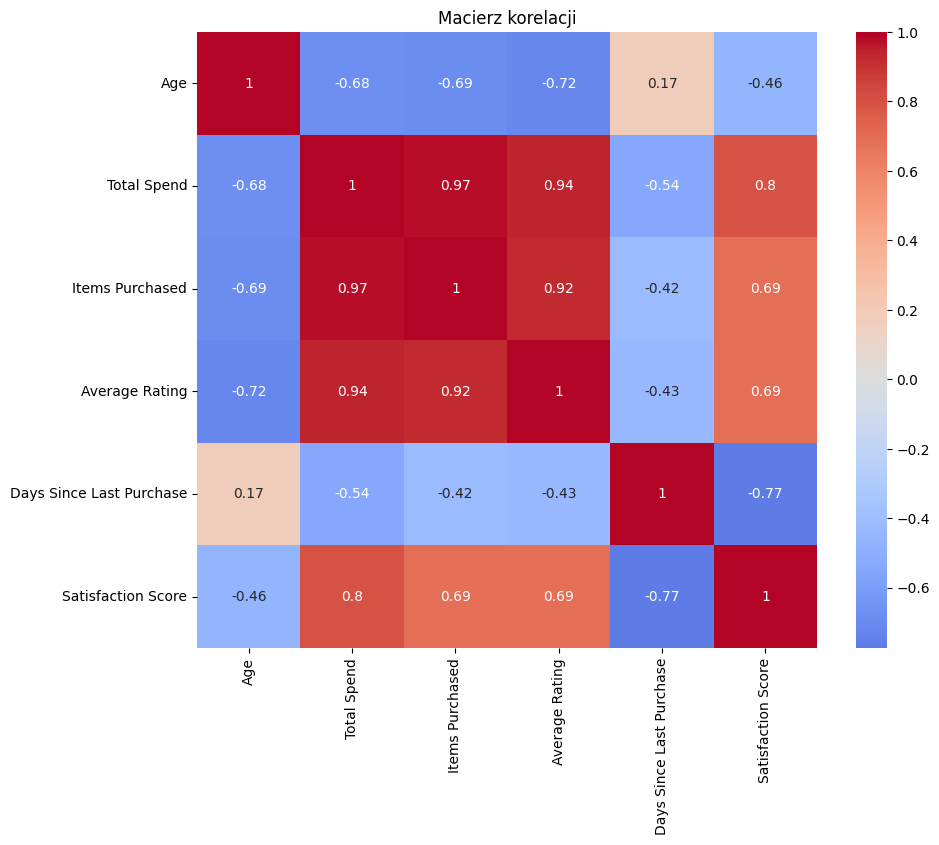

In [20]:
# Konwersja satysfakcji na wartości liczbowe
df['Satisfaction Score'] = df['Satisfaction Level'].map({'Unsatisfied': 0, 'Neutral': 1, 'Satisfied': 2})

# Macierz korelacji
corr_matrix = df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 
                  'Days Since Last Purchase', 'Satisfaction Score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Macierz korelacji')
plt.show()

Analiza macierzy korelacji pokazuje kilka istotnych zależności. Wiek klientów wykazuje umiarkowaną ujemną korelację z wydatkami, liczbą zakupionych produktów i średnimi ocenami, co sugeruje, że młodsi klienci mogą być bardziej aktywni zakupowo i wystawiać nieco lepsze oceny. Wydatki silnie korelują dodatnio z liczbą zakupionych produktów i średnimi ocenami, co wskazuje na wyraźny związek między kwotą wydaną a ilością zakupów i poziomem zadowolenia. Satysfakcja klientów jest silnie powiązana z wydatkami i umiarkowanie z liczbą produktów oraz ocenami, ale wykazuje silną ujemną korelację z czasem od ostatniego zakupu – im dłuższa przerwa, tym niższa satysfakcja. Co ciekawe, czas od ostatniego zakupu negatywnie wpływa też na wydatki  i oceny. Wyniki te sugerują, że kluczowe dla utrzymania satysfakcji są regularne zakupy i wyższe wydatki, podczas gdy wiek odgrywa drugorzędną rolę. Warto zwrócić uwagę na utrzymanie zaangażowania klientów, szczególnie tych o wyższych wydatkach, poprzez odpowiednie działania retencyjne.

## g) Analiza dyskryminacji cenowej

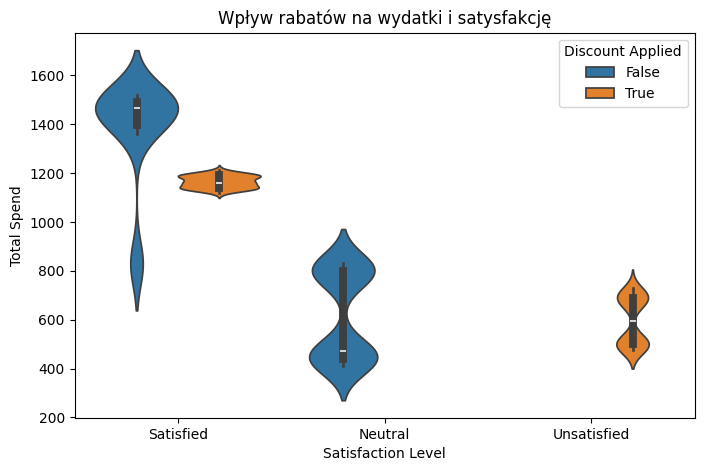

In [21]:
plt.figure(figsize=(8, 5))
#sns.boxplot(x='Discount Applied', y='Total Spend', hue='Satisfaction Level', data=df)
sns.violinplot(x='Satisfaction Level', y='Total Spend', hue='Discount Applied', data=df)
plt.title('Wpływ rabatów na wydatki i satysfakcję')
plt.show()

Analizując wpływ rabatów na wydatki i satysfakcję klientów, można zauważyć wyraźną prawidłowość - klienci, którzy otrzymali rabaty (True), częściej wydają mniej i deklarują niski poziom satysfakcji. Z kolei klienci bez rabatów (False) wydają zauważalnie mniej i w większości wykazują średni poziomy zadowolenia. 

Co ciekawe, spośród klientów niezadowolonych, wszyscy otrzymali rabat. Może to świadczyć o tym, że rabat nie był zgodny z ich oczekiwaniami i był znaczącym powodem niezadowolenia klientów.

Warto jednak zauważyć, że przedstawione dane pokazują jedynie korelację, a nie przyczynowość - możliwe, że to właśnie klienci o wyższych wydatkach częściej otrzymują atrakcyjne rabaty, a nie odwrotnie. Dla pełniejszego zrozumienia tej zależności potrzebne byłyby dodatkowe badania uwzględniające np. częstotliwość zakupów czy historię współpracy z klientem.

## h) Analiza czasu od ostatniego zakupu

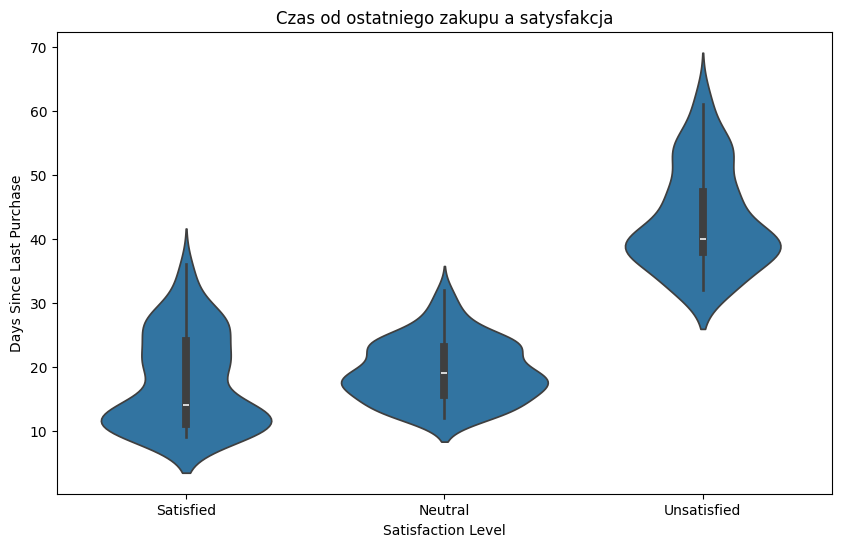

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Satisfaction Level', y='Days Since Last Purchase', data=df,
               order=['Satisfied', 'Neutral', 'Unsatisfied'])
plt.title('Czas od ostatniego zakupu a satysfakcja')
plt.show()

Analiza wykresu pokazuje wyraźną zależność między czasem od ostatniego zakupu a poziomem satysfakcji klientów. Klienci zadowoleni dokonują zakupów najczęściej. Najdłuższe przerwy, występują wśród klientów niezadowolonych. Ta prawidłowość sugeruje, że regularność zakupów idzie w parze z wyższym zadowoleniem z usług. Można przypuszczać, że częstsze interakcje z marką budują silniejsze relacje i pozytywne doświadczenia, podczas gdy dłuższe przerwy prowadzą do spadku satysfakcji. Warto zwrócić uwagę, że ta zależność może działać w obie strony - z jednej strony niezadowoleni klienci rzadziej kupują, z drugiej zaś sama rzadsza interakcja z marką może zmniejszać ich zaangażowanie i satysfakcję. Obserwacja ta wskazuje na potrzebę wdrożenia strategii aktywizujących klientów, szczególnie tych, u których czas od ostatniego zakupu zaczyna się wydłużać, aby zapobiec spadkowi ich zadowolenia.

# 2. Drugi zestaw danych - Google Merch Shop

## a) Analiza poziomu zaangażowania

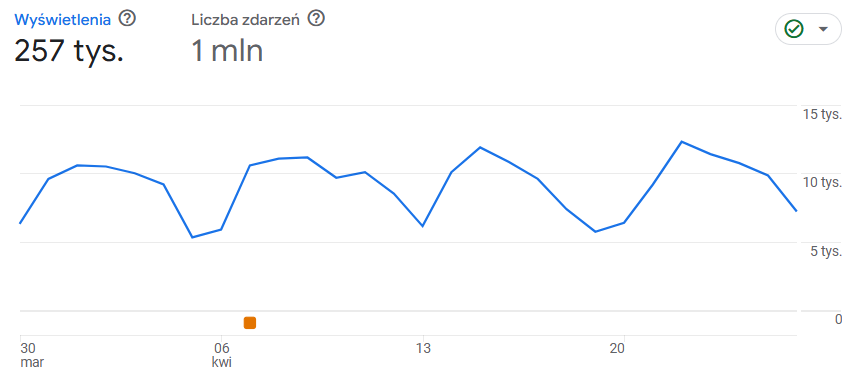

W okresie od 30 marca do 26 kwietnia było 257 tysięcy wejść Google Merch Shop poprzez witrynę internetową oraz aplikacje mobilne. Dzienne wejścia wahają się między ~5.000 do ~12.500. Strona utrzymuje stały ruch i nie ma przestojów w odwiedzających ją potencjalnych klientach.

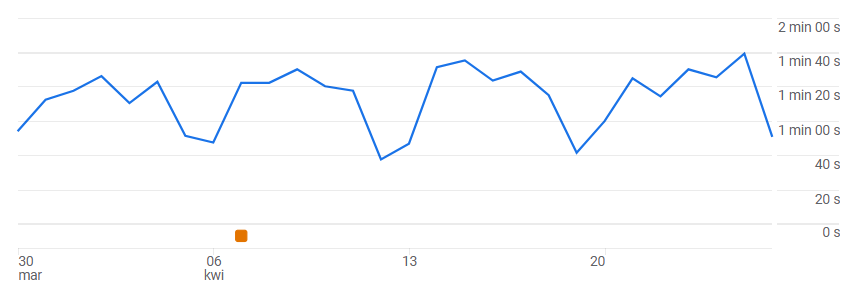

W okresie od 30 marca do 26 kwietnia średni czas zaangażowania na aktywnego użytkownika wynosił 1min 24sek. Dane wahają się między 40sek a 1min 40sek na użytkownika. Pokazuje to, ile czasu wybierając, przeglądając i kupując produkty spędza na stronie statystyczny klient. 

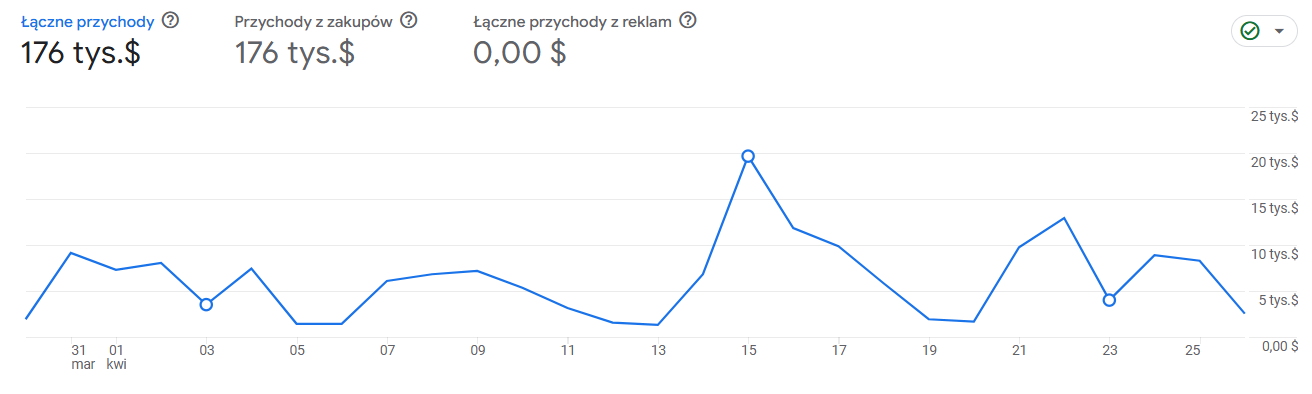

Strona w tym okresie wygenerowała 176.000 dolarów przychodu z samej sprzedaży produktów. Sądząc po $0 przychodzie z reklam przy około 10.000 odwiedzających dziennie, strona musi nie posiadać reklam zewnętrznych dostawców. Na wykresie da się zauważyć również 3 anomalie w dniach 3, 15 oraz 23 kwietnia, kiedy oczekiwany przychód był niższy lub wyższy niż zakładany.

3.04 - oczekiwana wartość 8.891 dolarów, rzeczywista wartość 3.564 dolarów (↓59,9%)
15.04 - oczekiwana wartość 7.057 dolarów, rzeczywista wartość 19.588 dolarów (↑177,5%)
23.04 - oczekiwana wartość 9.510 dolarów, rzeczywista wartość 4.043 dolarów (↓57,5%)

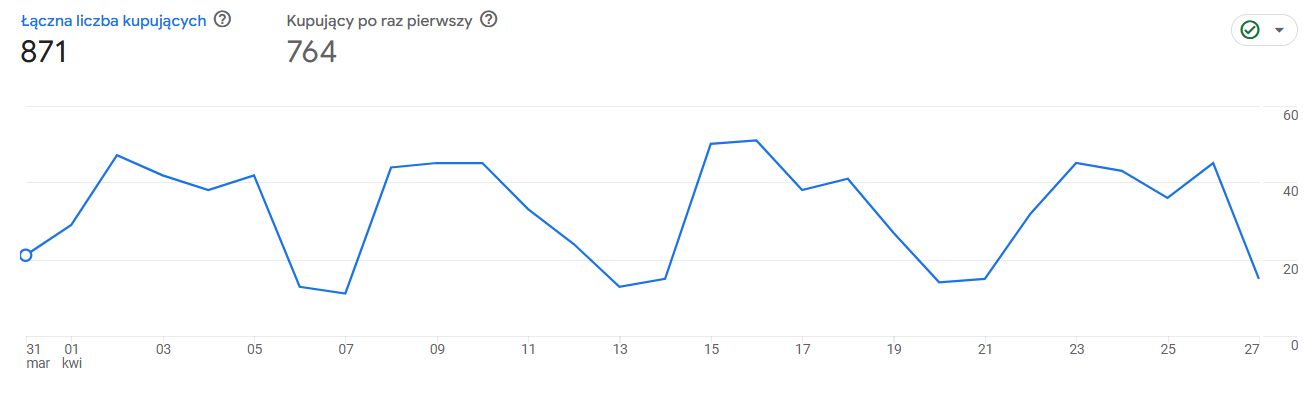

Strona generuje bardzo duże zainteresowanie wśród nowych użytkowników - na 871 kupujących, aż 764 to nowi klienci kupujący po raz pierwszy stanowiąc 87,7% ogółu. Może to stanowić o pozytywnych aspektach tj. budzenie zainteresowania wśród nowych potencjalnych klientów, jak i również o negatywnych tj. nieudolność w budowaniu stałej bazy powracających klientów. Dzienna ilość zakupów mimo wszystko jest dość nieregularna, wahając się od 11 do 52 kupujących.

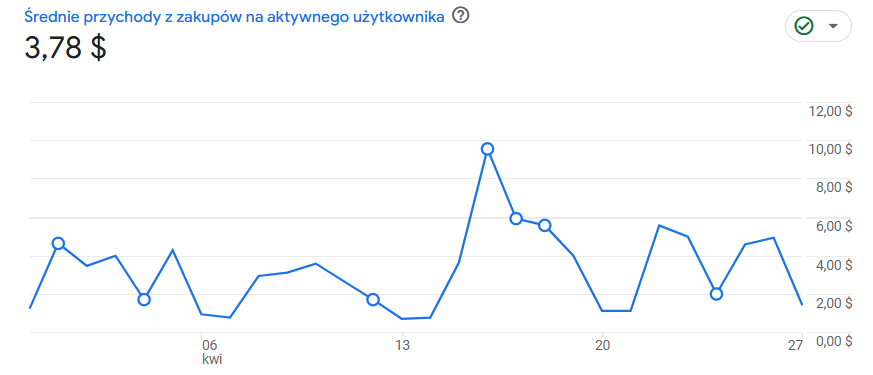

Ten wykres przedstawia średni przychód z zakupów na aktywnego użytkownika. Nie oddaje on średniej ilości wydanych pieniędzy na osobę kupującą, ponieważ uwzględnia w danych wszystkie osoby odwiedzające stronę, nawet te, które ostatecznie nie podejmują się finalizacji kupna żadnego produktu. Średni przychód z każdego użytkownika odwiedzającego stronę w omawianym przedziale czasowym wynosi 3,78 dolara. Dane wahają się między 0,69 dolara (13 kwietnia) do 9,56 dolara (16 kwietnia) kiedy to również wystąpiła anomalia i 193,5% wzrost względem wartości oczekiwanej w tym dniu wynoszącej 3,26 dolara.

## b) CBMG - Customer Behaviour Model Graph

W modelu zachowań klienta dla sklepu Google Merchandise Store użytkownik zazwyczaj rozpoczyna swoją wizytę od strony głównej lub stron kategorii. Następnie przegląda listę produktów i wchodzi na stronę konkretnego produktu. Po wybraniu interesującego artykułu użytkownik dodaje go do koszyka, przechodzi przez proces płatności (checkout), a finalnie dokonuje zakupu, który jest potwierdzony na stronie z podziękowaniem za zamówienie. Model ten obrazuje ścieżkę klienta e-commerce i pozwala na analizę miejsc, w których mogą pojawić się spadki zaangażowania.

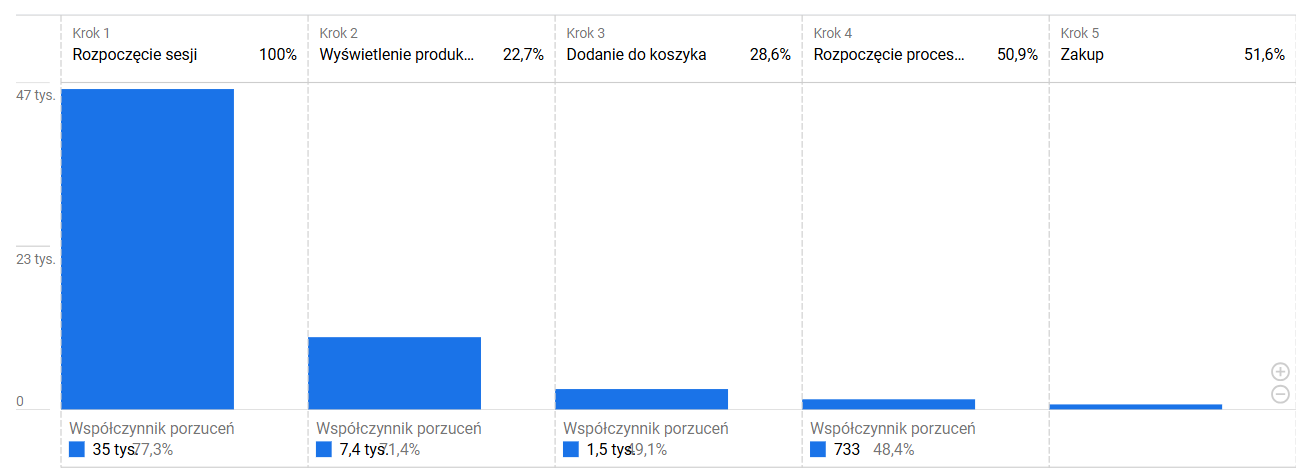

```mermaid
graph TD
    A[Wejście na stronę główną] --> B[Wejście na stronę konkretnego produktu]
    B --> C[Dodanie do koszyka]
    C --> D[Przejście do płatności]
    D --> E[Potwierdzenie transakcji]
```

Dane przedstawiają średnią ilość osób odwiedzających witrynę między 30 marca a 26 kwietnia. Największy spadek zainteresowania i tym samym ilość użytkowników którzy wychodzą ze strony widać już na stronie startowej. Współczynnik porzuceń wynosi tam aż 77,3%. Oznacza to, że najprawdopodobniej użytkownicy przeglądając listę produktów nie decydują się na żaden z nich, nie przechodząc dalej na stronę danego produktu. Z użytkowników którzy wyświetlają produkt, aż 71,4% nie postanawia dodać go do koszyka, nie kontynuując tym samym zakupów. 49,1% klientów, którzy dodali produkt do koszyka nie rozpoczyna procesu finalizacji transakcji, a 48,4% z tych którzy go rozpoczynają, nie kończą ostatecznie płatnością i porzucają dany produkt. Dane przekładają się na 1,6% osób, które weszły na stronę, ostatecznie kupuje produkt.